In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ipl2024 Matches.csv')

In [3]:
df.head()

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts
0,1,"March 22,2024",Banglore,Chennai,Banglore,Bat,173,6,176,4,Chennai,Mustafizur Rahman,Anuj Rawat,Mustafizur Rahman
1,2,"March 23,2024",Delhi,Punjab,Punjab,Field,174,9,177,6,Punjab,Sam Curran,Sam Curran,Kuldeep Yadav
2,3,"March 23,2024",Kolkata,Hyderabad,Hyderabad,Field,208,7,204,7,Kolkata,Andre Russell,Andre Russell,T Natarajan
3,4,"March 24,2024",Rajasthan,Lucknow,Rajasthan,Bat,193,4,173,6,Rajasthan,Sanju Samson,Sanju Samson,Trent Boult
4,5,"March 24,2024",Gujarat,Mumbai,Mumbai,Field,168,6,162,9,Gujarat,Sai Sudharsan,Dewald Brevis,Jasprit Bumrah


In [4]:
df.shape

(74, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   74 non-null     int64 
 1   date                 74 non-null     object
 2   team1                74 non-null     object
 3   team2                74 non-null     object
 4   toss_winner          74 non-null     object
 5   decision             71 non-null     object
 6   first_score          74 non-null     int64 
 7   first_wkts           74 non-null     int64 
 8   second_score         74 non-null     int64 
 9   second_wkts          74 non-null     int64 
 10  winner               74 non-null     object
 11  player_of_the_match  71 non-null     object
 12  most_runs            71 non-null     object
 13  most_wkts            71 non-null     object
dtypes: int64(5), object(9)
memory usage: 8.2+ KB


In [13]:
df.isnull().sum()

id                     0
date                   0
team1                  0
team2                  0
toss_winner            0
decision               3
first_score            0
first_wkts             0
second_score           0
second_wkts            0
winner                 0
player_of_the_match    3
most_runs              3
most_wkts              3
dtype: int64

In [12]:
df[df.decision.isnull()]

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts
62,63,"May 13,2024",Gujarat,Kolkata,No Toss,NaN,0,0,0,0,Abandoned,NaN,NaN,NaN
65,66,"May 16,2024",Hyderabad,Gujarat,No Toss,NaN,0,0,0,0,Abandoned,NaN,NaN,NaN
69,70,"May 19,2024",Rajasthan,Kolkata,Kolkata,NaN,0,0,0,0,Abandoned,NaN,NaN,NaN


In [3]:
ipl=df.copy()  # backup df

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

id                     0
date                   0
team1                  0
team2                  0
toss_winner            0
decision               0
first_score            0
first_wkts             0
second_score           0
second_wkts            0
winner                 0
player_of_the_match    0
most_runs              0
most_wkts              0
dtype: int64

In [18]:
df.shape

(71, 14)

In [5]:
df['date']=pd.to_datetime(df['date'], format='%B %d,%Y')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, 0 to 73
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   71 non-null     int64         
 1   date                 71 non-null     datetime64[ns]
 2   team1                71 non-null     object        
 3   team2                71 non-null     object        
 4   toss_winner          71 non-null     object        
 5   decision             71 non-null     object        
 6   first_score          71 non-null     int64         
 7   first_wkts           71 non-null     int64         
 8   second_score         71 non-null     int64         
 9   second_wkts          71 non-null     int64         
 10  winner               71 non-null     object        
 11  player_of_the_match  71 non-null     object        
 12  most_runs            71 non-null     object        
 13  most_wkts            71 non-null     objec

In [24]:
df.describe()

,id,date,first_score,first_wkts,second_score,second_wkts
count,71.000000,71,71.000000,71.000000,71.000000,71.000000
mean,36.281690,2024-04-20 14:32:06.760563456,188.183099,6.408451,176.197183,6.028169
min,1.000000,2024-03-22 00:00:00,89.000000,3.000000,92.000000,0.000000
25%,18.500000,2024-04-05 12:00:00,165.000000,5.000000,152.000000,4.000000
50%,36.000000,2024-04-21 00:00:00,185.000000,6.000000,174.000000,6.000000
75%,53.500000,2024-05-05 00:00:00,209.000000,8.000000,199.000000,8.000000
max,74.000000,2024-05-26 00:00:00,277.000000,10.000000,262.000000,10.000000
std,21.091083,NaN,36.716018,2.161861,33.036179,2.735856


##### In the above table, the max value in first_score column is 277, but srh scored 287 against rcb , so lets debug it.

In [30]:
df[((df['team1']=='Hyderabad') | (df['team2']=='Hyderabad')) & ((df['team1']=='Banglore') | (df['team2']=='Banglore'))]

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts
29,30,2024-04-15,Hyderabad,Banglore,Banglore,Field,187,3,262,7,Hyderabad,Travis Head,Travis Head,Pat Cummins
40,41,2024-04-25,Banglore,Hyderabad,Banglore,Bat,206,7,171,8,Banglore,Rajat Patidar,Virat Kohli,Jaydev Unadkat


##### As we can see in the first row of above filtered df, there is a mistyping in first_score column, it should be 287 instead of 187.

In [6]:
df.loc[df['date']=='2024-04-15','first_score']=287

In [16]:
df[((df['team1']=='Hyderabad') | (df['team2']=='Hyderabad')) & ((df['team1']=='Banglore') | (df['team2']=='Banglore'))] # verify the change

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts
29,30,2024-04-15,Hyderabad,Banglore,Banglore,Field,287,3,262,7,Hyderabad,Travis Head,Travis Head,Pat Cummins
40,41,2024-04-25,Banglore,Hyderabad,Banglore,Bat,206,7,171,8,Banglore,Rajat Patidar,Virat Kohli,Jaydev Unadkat


In [17]:
df.describe()

,id,date,first_score,first_wkts,second_score,second_wkts
count,71.000000,71,71.000000,71.000000,71.000000,71.000000
mean,36.281690,2024-04-20 14:32:06.760563456,189.591549,6.408451,176.197183,6.028169
min,1.000000,2024-03-22 00:00:00,89.000000,3.000000,92.000000,0.000000
25%,18.500000,2024-04-05 12:00:00,165.000000,5.000000,152.000000,4.000000
50%,36.000000,2024-04-21 00:00:00,185.000000,6.000000,174.000000,6.000000
75%,53.500000,2024-05-05 00:00:00,211.000000,8.000000,199.000000,8.000000
max,74.000000,2024-05-26 00:00:00,287.000000,10.000000,262.000000,10.000000
std,21.091083,NaN,38.542584,2.161861,33.036179,2.735856


In [7]:
df['total_runs']=df['first_score']+df['second_score']

In [8]:
df['total_wkts']=df['first_wkts']+df['second_wkts']

In [20]:
df.head()

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts,total_runs,total_wkts
0,1,2024-03-22,Banglore,Chennai,Banglore,Bat,173,6,176,4,Chennai,Mustafizur Rahman,Anuj Rawat,Mustafizur Rahman,349,10
1,2,2024-03-23,Delhi,Punjab,Punjab,Field,174,9,177,6,Punjab,Sam Curran,Sam Curran,Kuldeep Yadav,351,15
2,3,2024-03-23,Kolkata,Hyderabad,Hyderabad,Field,208,7,204,7,Kolkata,Andre Russell,Andre Russell,T Natarajan,412,14
3,4,2024-03-24,Rajasthan,Lucknow,Rajasthan,Bat,193,4,173,6,Rajasthan,Sanju Samson,Sanju Samson,Trent Boult,366,10
4,5,2024-03-24,Gujarat,Mumbai,Mumbai,Field,168,6,162,9,Gujarat,Sai Sudharsan,Dewald Brevis,Jasprit Bumrah,330,15


In [21]:
print('The highest total runs scored in a match is : ',df['total_runs'].max())

The highest total runs scored in a match is :  549


In [26]:
df[df['total_runs']==df['total_runs'].max()]

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts,total_runs,total_wkts
29,30,2024-04-15,Hyderabad,Banglore,Banglore,Field,287,3,262,7,Hyderabad,Travis Head,Travis Head,Pat Cummins,549,10


In [28]:
print('The highest total wickets in a match is : ',df['total_wkts'].max())
df[df['total_wkts']==df['total_wkts'].max()]

The highest total wickets in a match is :  20


,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts,total_runs,total_wkts
50,51,2024-05-03,Kolkata,Mumbai,Mumbai,Field,169,10,145,10,Kolkata,Venkatesh Iyer,Venkatesh Iyer,Mitchell Starc,314,20


In [30]:
print('The lowest total wickets in a match is : ',df['total_wkts'].min())
df[df['total_wkts']==df['total_wkts'].min()]

The lowest total wickets in a match is :  4


,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts,total_runs,total_wkts
44,45,2024-04-28,Gujarat,Banglore,Banglore,Field,200,3,206,1,Banglore,Will Jacks,Will Jacks,Swapnil Singh,406,4
56,57,2024-05-08,Lucknow,Hyderabad,Lucknow,Bat,165,4,167,0,Hyderabad,Travis Head,Travis Head,Bhuvneshwar Kumar,332,4


In [31]:
print('The lowest total runs scored in a match is : ',df['total_runs'].min())
df[df['total_runs']==df['total_runs'].min()]

The lowest total runs scored in a match is :  181


,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts,total_runs,total_wkts
31,32,2024-04-17,Gujarat,Delhi,Delhi,Field,89,10,92,4,Delhi,Rishabh Pant,Rashid Khan,Mukesh Kumar,181,14


#### Which player has won maximum number of potm ?

In [33]:
df['player_of_the_match'].value_counts().head(3)

player_of_the_match
Travis Head        3
Abhishek Sharma    3
Sunil Narine       3
Name: count, dtype: int64

#### Number of matches won by each team

In [34]:
df['winner'].value_counts()

winner
Kolkata      11
Rajasthan     9
Hyderabad     9
Chennai       7
Banglore      7
Lucknow       7
Delhi         7
Punjab        5
Gujarat       5
Mumbai        4
Name: count, dtype: int64

#### The team that won most tosses

In [35]:
df['toss_winner'].value_counts()

toss_winner
Rajasthan    11
Punjab       10
Mumbai       10
Lucknow       9
Banglore      8
Hyderabad     7
Delhi         7
Gujarat       3
Kolkata       3
Chennai       3
Name: count, dtype: int64

In [12]:
df.head()

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts
0,1,2024-03-22,Banglore,Chennai,Banglore,Bat,173,6,176,4,Chennai,Mustafizur Rahman,Anuj Rawat,Mustafizur Rahman
1,2,2024-03-23,Delhi,Punjab,Punjab,Field,174,9,177,6,Punjab,Sam Curran,Sam Curran,Kuldeep Yadav
2,3,2024-03-23,Kolkata,Hyderabad,Hyderabad,Field,208,7,204,7,Kolkata,Andre Russell,Andre Russell,T Natarajan
3,4,2024-03-24,Rajasthan,Lucknow,Rajasthan,Bat,193,4,173,6,Rajasthan,Sanju Samson,Sanju Samson,Trent Boult
4,5,2024-03-24,Gujarat,Mumbai,Mumbai,Field,168,6,162,9,Gujarat,Sai Sudharsan,Dewald Brevis,Jasprit Bumrah


#### Total runs scored by each team

In [9]:
d={}
lst=df.team1.unique()
for i in lst:
    a=df[df['team1']==i]
    b=df[df['team2']==i]
    c=a['first_score'].sum() + b['second_score'].sum()
    d[i]=c
print(dict(sorted(d.items(), key=lambda item: item[1], reverse=True)))

{'Hyderabad': 3052, 'Banglore': 2930, 'Kolkata': 2667, 'Rajasthan': 2647, 'Delhi': 2573, 'Mumbai': 2568, 'Chennai': 2524, 'Punjab': 2487, 'Lucknow': 2483, 'Gujarat': 2040}


#### Total wickets taken by each Team

In [10]:
d2={}
l=df.team1.unique()
for j in l:
    a=df[df['team1']==j]
    b=df[df['team2']==j]
    c=a['second_wkts'].sum() + b['first_wkts'].sum()
    d2[j]=c
print(dict(sorted(d2.items(), key=lambda item: item[1], reverse=True)))

{'Kolkata': 110, 'Punjab': 101, 'Delhi': 99, 'Rajasthan': 96, 'Banglore': 88, 'Mumbai': 85, 'Hyderabad': 83, 'Chennai': 79, 'Gujarat': 71, 'Lucknow': 71}


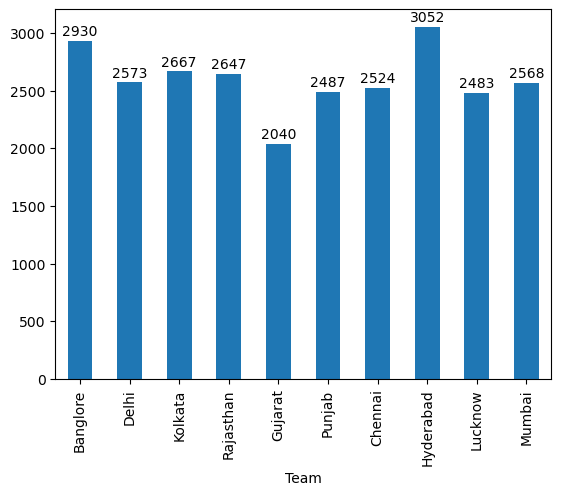

In [27]:
r=pd.DataFrame(list(d.items()),columns=['Team','TotalRuns'])
ax=r.plot(kind='bar',x='Team',y='TotalRuns',legend=False)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 20, 
            str(int(i.get_height())), 
            ha='center', va='bottom')

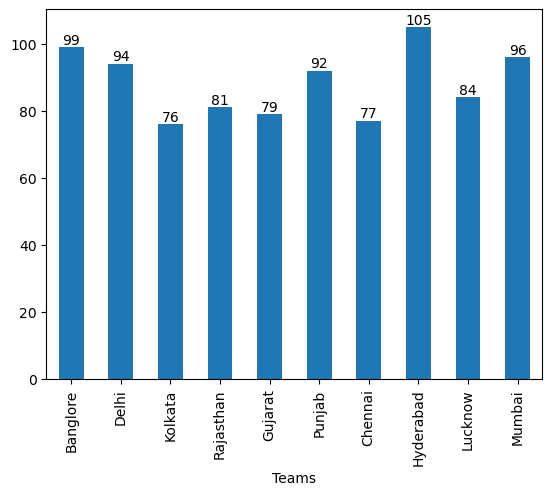

In [73]:
w=pd.DataFrame(list(d2.items()), columns=['Teams','TotalWicketsTaken'])
a=w.plot(kind='bar',x='Teams',y='TotalWicketsTaken',legend=False)
for i in a.patches:
    a.text(i.get_x() + i.get_width()/2,i.get_height(),str(int(i.get_height())),ha='center',va='bottom')

#### Total wickets lost by each teams

In [37]:
d3={}
l=df.team1.unique()
for j in l:
    a=df[df['team1']==j]
    b=df[df['team2']==j]
    c=a['first_wkts'].sum() + b['second_wkts'].sum()
    d3[j]=c
print(dict(sorted(d3.items(), key=lambda item: item[1], reverse=True)))

{'Hyderabad': 105, 'Banglore': 99, 'Mumbai': 96, 'Delhi': 94, 'Punjab': 92, 'Lucknow': 84, 'Rajasthan': 81, 'Gujarat': 79, 'Chennai': 77, 'Kolkata': 76}


Text(0.5, 1.0, 'Wickets Lost by Teams')

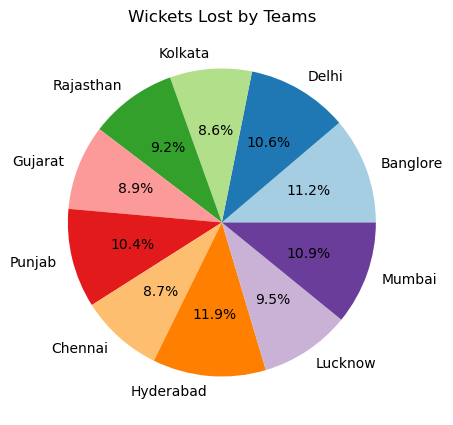

In [51]:
wl=pd.DataFrame(list(d3.items()),columns=['Teams','WicketsLost'])
plt.figure(figsize=(7, 5))
plt.pie(wl['WicketsLost'],labels=wl['Teams'],autopct='%1.1f%%',colors=plt.cm.Paired(range(len(wl))))
plt.title('Wickets Lost by Teams')


In [52]:
df.head()

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts,total_runs,total_wkts
0,1,2024-03-22,Banglore,Chennai,Banglore,Bat,173,6,176,4,Chennai,Mustafizur Rahman,Anuj Rawat,Mustafizur Rahman,349,10
1,2,2024-03-23,Delhi,Punjab,Punjab,Field,174,9,177,6,Punjab,Sam Curran,Sam Curran,Kuldeep Yadav,351,15
2,3,2024-03-23,Kolkata,Hyderabad,Hyderabad,Field,208,7,204,7,Kolkata,Andre Russell,Andre Russell,T Natarajan,412,14
3,4,2024-03-24,Rajasthan,Lucknow,Rajasthan,Bat,193,4,173,6,Rajasthan,Sanju Samson,Sanju Samson,Trent Boult,366,10
4,5,2024-03-24,Gujarat,Mumbai,Mumbai,Field,168,6,162,9,Gujarat,Sai Sudharsan,Dewald Brevis,Jasprit Bumrah,330,15


#### What did the toss winning decide the most ?

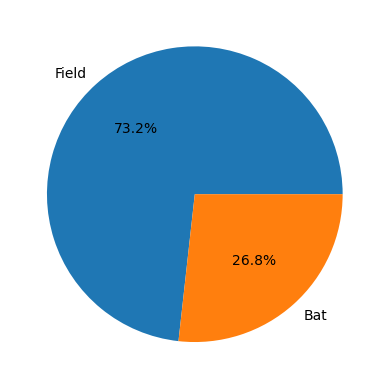

In [62]:
valuecount=df['decision'].value_counts()
plt.pie(valuecount,labels=valuecount.index,autopct='%1.1f%%')
plt.show()

#### What is the percentage of winning the match after winning the toss ?

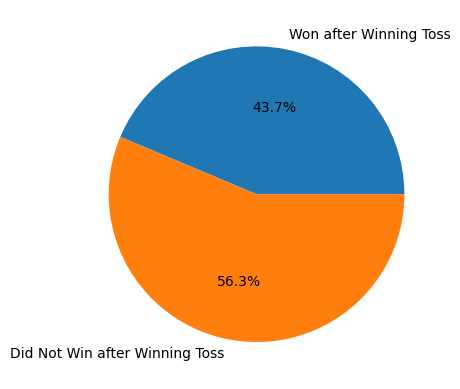

In [71]:
toss_win=(df[df['toss_winner']==df['winner']].shape[0]/df.shape[0])*100
no_toss_win=100-toss_win

dp={
    'Outcome':['Won after Winning Toss', 'Did Not Win after Winning Toss'],
    'Percentage': [toss_win, no_toss_win]
}
piedf=pd.DataFrame(dp)
plt.pie(piedf['Percentage'],labels=piedf['Outcome'],autopct='%1.1f%%')
plt.show()

In [34]:
df['team1'].value_counts() + df['team2'].value_counts()

Banglore     15
Chennai      14
Delhi        14
Gujarat      12
Hyderabad    16
Kolkata      14
Lucknow      14
Mumbai       14
Punjab       14
Rajasthan    15
Name: count, dtype: int64

In [74]:
df.head()

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts,total_runs,total_wkts
0,1,2024-03-22,Banglore,Chennai,Banglore,Bat,173,6,176,4,Chennai,Mustafizur Rahman,Anuj Rawat,Mustafizur Rahman,349,10
1,2,2024-03-23,Delhi,Punjab,Punjab,Field,174,9,177,6,Punjab,Sam Curran,Sam Curran,Kuldeep Yadav,351,15
2,3,2024-03-23,Kolkata,Hyderabad,Hyderabad,Field,208,7,204,7,Kolkata,Andre Russell,Andre Russell,T Natarajan,412,14
3,4,2024-03-24,Rajasthan,Lucknow,Rajasthan,Bat,193,4,173,6,Rajasthan,Sanju Samson,Sanju Samson,Trent Boult,366,10
4,5,2024-03-24,Gujarat,Mumbai,Mumbai,Field,168,6,162,9,Gujarat,Sai Sudharsan,Dewald Brevis,Jasprit Bumrah,330,15


In [75]:
df[df['winner']=='Banglore']

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts,total_runs,total_wkts
5,6,2024-03-25,Punjab,Banglore,Banglore,Field,176,6,178,6,Banglore,Virat Kohli,Virat Kohli,Harpreet Brar,354,12
40,41,2024-04-25,Banglore,Hyderabad,Banglore,Bat,206,7,171,8,Banglore,Rajat Patidar,Virat Kohli,Jaydev Unadkat,377,15
44,45,2024-04-28,Gujarat,Banglore,Banglore,Field,200,3,206,1,Banglore,Will Jacks,Will Jacks,Swapnil Singh,406,4
51,52,2024-05-04,Gujarat,Banglore,Banglore,Field,147,10,152,6,Banglore,Mohammed Siraj,Faf du Plessis,Josh Little,299,16
57,58,2024-05-09,Banglore,Punjab,Punjab,Field,241,7,181,10,Banglore,Virat Kohli,Virat Kohli,Harshal Patel,422,17
61,62,2024-05-12,Banglore,Delhi,Delhi,Field,187,9,140,10,Banglore,Cameron Green,Axar Patel,Yash Dayal,327,19
67,68,2024-05-18,Banglore,Chennai,Chennai,Field,218,5,191,7,Banglore,Faf du Plessis,Rachin Ravindra,Yash Dayal,409,12


['Banglore' 'Delhi' 'Kolkata' 'Rajasthan' 'Gujarat' 'Punjab' 'Chennai'
 'Hyderabad' 'Lucknow' 'Mumbai']
[1758, 1428, 1884, 859, 1034, 679, 1504, 1995, 1446, 874]
[1213, 1400, 768, 1822, 1093, 1921, 1091, 1170, 1166, 1817]


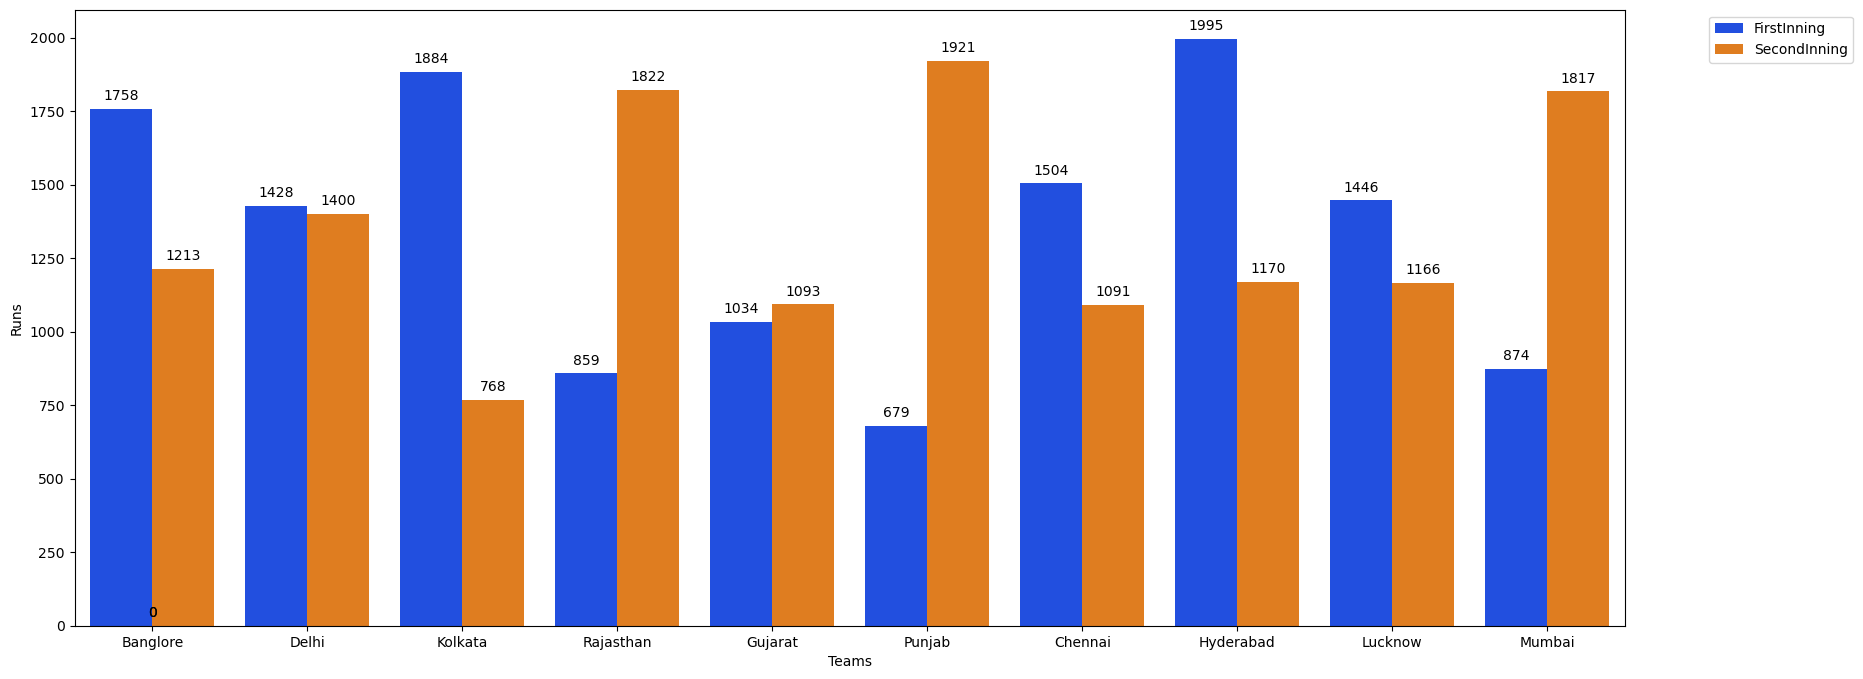

In [21]:
lt=df.team1.unique()
print(lt)
firstruns=[]
secondruns=[]
for i in lt:
    firstruns.append(df[df['team1']==i]['first_score'].sum())
    secondruns.append(df[df['team2']==i]['first_score'].sum())
print(firstruns)
print(secondruns)
d4={
    'Teams':list(lt),
    'FirstInning':firstruns,
    'SecondInning':secondruns
}
inningdf=pd.DataFrame(d4)
melted_df = inningdf.melt(id_vars='Teams',var_name='Innings',value_name='Runs')
plt.figure(figsize=(20,8))
barplot=sns.barplot(data=melted_df,x='Teams',y='Runs',hue='Innings',palette='bright')
for i in barplot.patches:
    barplot.text(i.get_x() + i.get_width() / 2, i.get_height() + 20, 
            str(int(i.get_height())), 
            ha='center', va='bottom')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

C:\Users\Amir Khan\AppData\Local\Temp\ipykernel_62364\2090305636.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp=sns.barplot(x=v.index,y=v,palette='viridis')


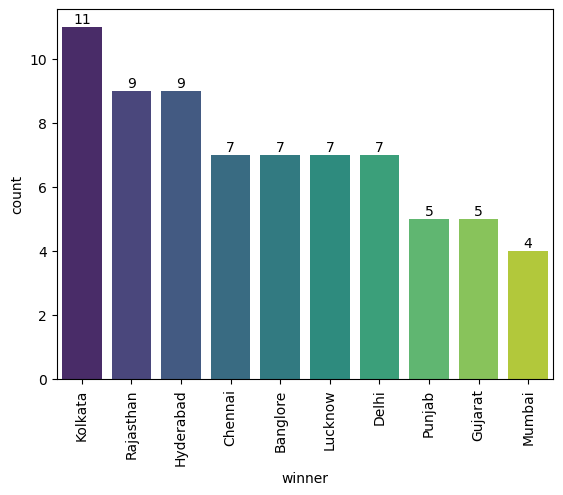

In [33]:
v=df['winner'].value_counts()
bp=sns.barplot(x=v.index,y=v,palette='viridis')
for i in bp.patches:
    bp.text(i.get_x() + i.get_width()/2,i.get_height()+0.01, str(int(i.get_height())), ha='center',va='bottom')

plt.xticks(rotation=90)
plt.show()

## CONCLUSION 
##### Team Rajasthan had the hightest percentage of TOSS wins which is 14.9%
##### Majority of the times, the team that won the toss decided to field which is by 73.2%
##### Throught the tournament, Kolkata won most of the matches
##### Batting First Hyrdrabad scored maximum number of runs which is 1895
##### Batting First Punjab scored minimum number of runs which is 679
##### Batting second Punjab scored maximum number of runs which is 1808
##### Batting second Kolkata scored the minimum number of wickets which is 783
##### Throughout the Tournament Hydrabad scored the maximum runs which is 2952 runs which is 11.4% runs share
##### Throughout the Tournament Gujrat scored the minimum runs which is 2040 runs which is 7.9% runs share
##### Batting First Hyrdrabad lost the maximum number of wickets which is 70
##### Batting First Rajasthan lost the minimum number of wickets which is 26
##### Batting second Punjab lost the maximum number of wickets which is 63
##### Batting second Kolkata lost the minimum number of wickets which is 12
##### Throughout the Tournament Hydrabad lost the maximum number of wickets which is 105 which is 11.9% wicket share
##### Throughout the Tournament Kolkata lost the minimum number of wickets which is 76 which is 8.6% wicket share